In [31]:
import numpy as np
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet
import losses
import activations
import os
from mnist import Mnist
from tqdm import tqdm
import gradients
import warnings


In [32]:
mnist = Mnist()
(x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, one_hot_label=True)

### Testing whether mnist dataset loaded successfully

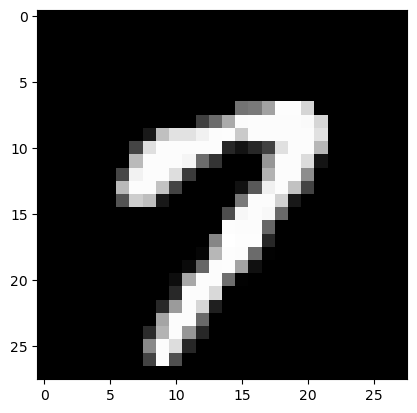

In [16]:
plt.imshow(x_train[15].reshape(28, 28), cmap='gray')
plt.show()

### Training TwoLayerNet

hyperparams

In [17]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 50
learning_rate = 0.1
#see batch mask
batch_mask = np.random.choice(train_size, batch_size)

In [18]:
net = TwoLayerNet(input_size=28*28, hidden_size=1000, output_size=10)

In [19]:
train_losses = []
for i in tqdm(range(iters_num)):
    # get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = net.gradient(x_batch, t_batch)
   
    for key in ('w1', 'b1', 'w2', 'b2'):
        net.params[key] -= learning_rate*grad[key]

    loss = net.loss(x_batch, t_batch)

    train_losses.append(loss)

100%|██████████| 10000/10000 [03:21<00:00, 49.56it/s]


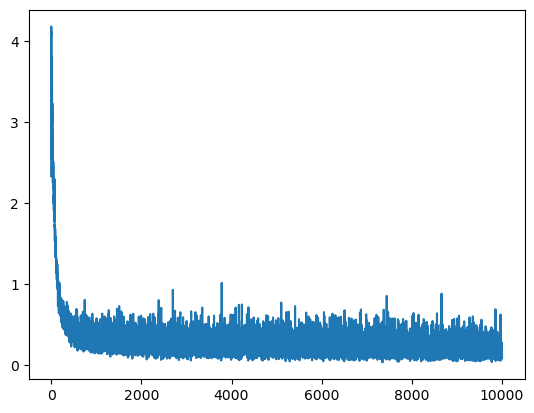

In [20]:
plt.figure()
plt.plot(train_losses)
plt.show()

### Test the model on hand written digits

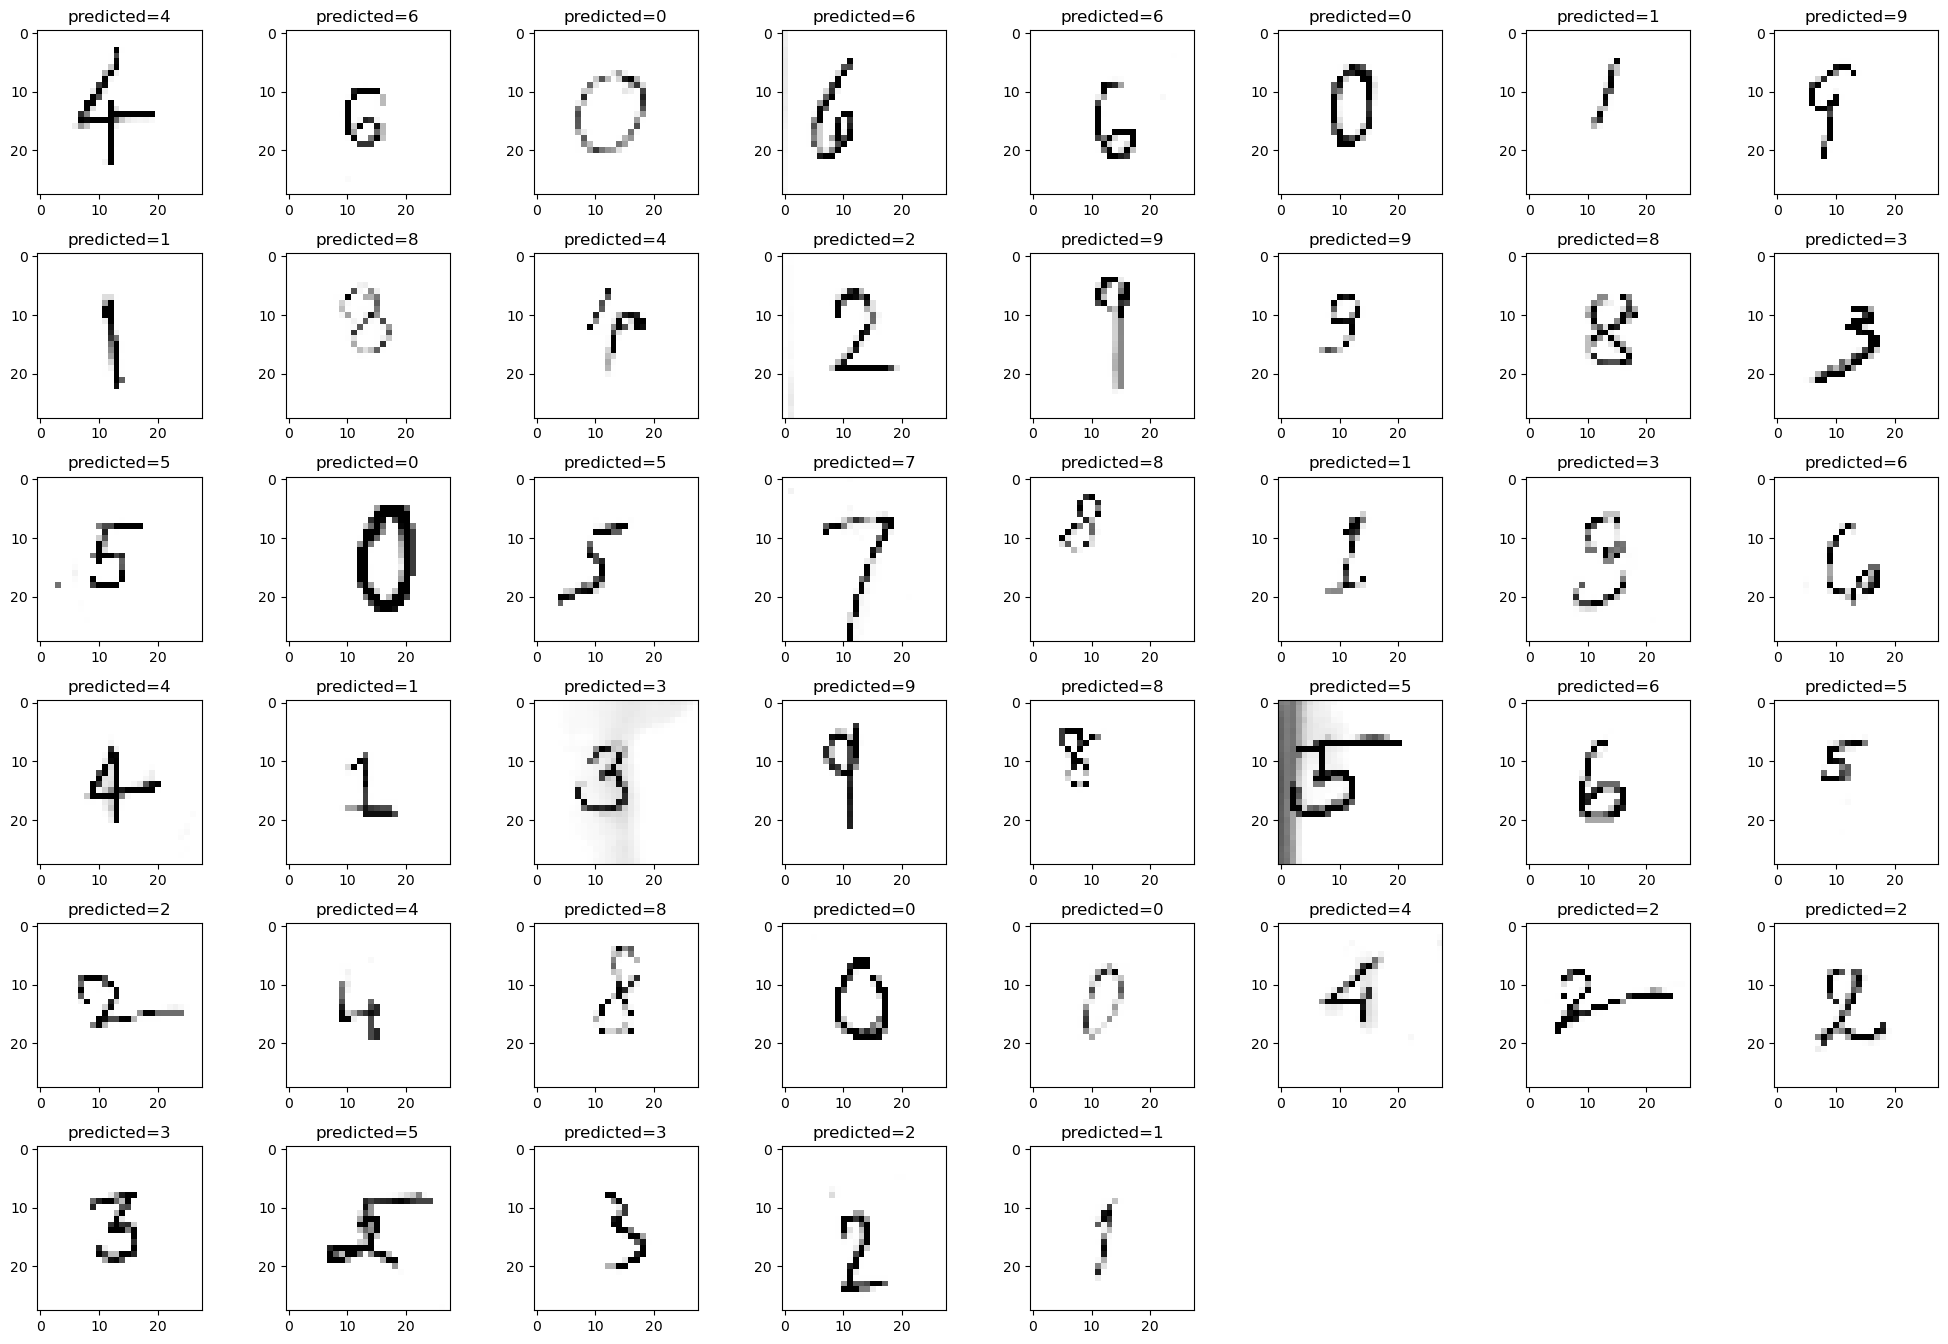

In [33]:
import sys
import cv2
import glob
warnings.filterwarnings('ignore')

#const definition
mnist_pkl_filename = 'nidamanuri_mnist_nn_model.pkl'
predicted_nums=[]
rows = 9
columns = 8
i = 1
j=0
figure = plt.figure(figsize=(20,20))

file_name = []
for image_Name in glob.glob('test_images_1/*.PNG'):
    file_name.append(image_Name)
    
path = glob.glob("*.PNG")
for img in path:
    predicted_nums.append(img[:1])
    

for name in file_name:

        image = cv2.imread(name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image,(28,28))
        predictd_nums=predicted_nums[j]
        # Add subplot to the ith position
        figure.add_subplot(9, 8, i)
        plt.imshow(image, cmap='gray')
        i += 1
        j+=1
        image = image.reshape(784,) # reshape the image to the 784 vector
        
        mnist = Mnist()
        (x_train, t_train), (x_test, t_test) = mnist.load_data(normalize=True, one_hot_label=True)
        #hyperparameter tuning
        iterations = 10000
        batch_size = 50
        learning_rate = 0.1
        hidden_size = 500
        network = TwoLayerNet(input_size = mnist.img_size, hidden_size = hidden_size, output_size = 10)
        network.load_model(mnist_pkl_filename)
        #network.save_model(mnist_pkl_filename)
        y = TwoLayerNet.predict(network, image)
        predicted_num = int(np.argmax(y))
        figure.tight_layout()
        plt.title('predicted={}'.format(predictd_nums))